For improved readability of the Notebook, use [Markdown Cheat Sheet](https://gtribello.github.io/mathNET/assets/notebook-writing.html) and [Unofficial Jupyter Extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html).

# 1. Imports and Installations

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
#import custom_functions as func
#import analysis_functions as afunc
#import prep_data as prep
#import plot_functions as plot

# 2. Load & View Data

In [2]:
# get data as dataframe
df_raw = pd.read_csv("data/StackOverflow2020/survey_results_public.csv")  # results
schema = pd.read_csv("data/StackOverflow2020/survey_results_schema.csv")  # question schema
df = df_raw.copy(deep=True)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
# out: description of a column (desc) as string
# in: column name (column_name)
def get_description(column_name, schema=schema):
    desc = schema.set_index('Column').loc[f'{column_name}']['QuestionText']
    return desc

# get column descriptions (respective survey questions)
survey_question = get_description('MainBranch')

In [4]:
# get dataframe dimensions
shape = df.shape

In [5]:
# out: percentage of NaN values (perc_nan), percentage and number of columns with more than x percent of values missing (number_nan_over_x, perc_nan_over_x) in the dataframe
# in: dataframe (df)
def get_nan_perc(df, threshold):
    # columns with corresponding percentage of nan values
    perc_nan = df.isnull().sum()/len(df)
    # columns with more than x percent of nan values
    perc_nan_over_x = (df.isnull().sum()/len(df)) > threshold
    # number of columns
    number_nan_over_x = np.sum(perc_nan > threshold)
    return perc_nan, perc_nan_over_x, number_nan_over_x

# get nan value stats
perc_nan, perc_nan_over_x, number_nan_over_x = get_nan_perc(df, .5)

# Custom Functions - Data Wrangling

In [6]:
# out: dataframe (df) without rows removed where all values from a given subset or column are missing
# in: dataframe (df) and subset or column (subset)
def dropna_subset(df, subset):
    df = df.dropna(subset=[subset]).copy(deep=True)
    return df

In [7]:
# out: dataframe (overview_df) with value counts and the respective percentages for a given column
# in: dataframe (df) and column to count values for (feature_column)
def feature_overview(df, feature_column, dropna=False):
    val_counts = df[feature_column].value_counts(dropna=dropna)
    overview_df = pd.DataFrame({'count': val_counts, 'share': val_counts / val_counts.sum()})
    return overview_df

In [8]:
# out: two dataframes (counts, shares) with value counts and respective percentages for a given grouped feature
# in: column to get the values for (feature) and column to group the results into (x_column)
def feature_by_x(df, feature, x_column):
    # get feature counts per x_column & unstack multi-index
    counts = df.groupby(x_column)[feature].value_counts().unstack(level=0)
    # get feature percentages per x_column & unstack multi-index (get x by feature dataframe)
    shares = counts.apply(lambda x: x/x.sum())
    return counts, shares

In [9]:
# out: multiple choice answers for the DevType, NEWJobHunt, JobFactors columns (DevTypeAnswers, NEWJobHuntAnswers, JobFactorsAnswers) as lists
# in: -
def get_multiple_choice_answers():
    DevTypeAnswers = ["Academic researcher",
                    "Data or business analyst",
                    "Data scientist or machine learning specialist",
                    "Database administrator",
                    "Designer",
                    "Developer, back-end",
                    "Developer, desktop or enterprise applications",
                    "Developer, embedded applications or devices",
                    "Developer, front-end",
                    "Developer, full-stack",
                    "Developer, game or graphics",
                    "Developer, mobile",
                    "Developer, QA or test",
                    "DevOps specialist",
                    "Educator",
                    "Engineer, data",
                    "Engineer, site reliability",
                    "Engineering manager",
                    "Marketing or sales professional",
                    "Product manager",
                    "Scientist",
                    "Senior Executive (C-Suite, VP, etc.)",
                    "System administrator"]
    NEWJobHuntAnswers = ['Just because',
                        'Having a bad day (or week or month) at work',
                        'Wanting to share accomplishments with a wider network',
                        'Curious about other opportunities',
                        'Better compensation',
                        'Trouble with my teammates',
                        'Trouble with my direct manager',
                        'Trouble with leadership at my company',
                        'Better work/life balance',
                        'Wanting to work with new technologies',
                        'Growth or leadership opportunities',
                        'Looking to relocate']
    JobFactorsAnswers = ['Remote work options',
                        'Office environment or company culture',
                        'Financial performance or funding status of the company or organization',
                        'Opportunities for professional development',
                        'Diversity of the company or organization',
                        'How widely used or impactful my work output would be',
                        'Industry that I’d be working in',
                        'Specific department or team I’d be working on',
                        'Flex time or a flexible schedule',
                        'Languages, frameworks, and other technologies I’d be working with',
                        'Family friendliness']
    return DevTypeAnswers, NEWJobHuntAnswers, JobFactorsAnswers

# out: dataframe (df_dummy) with 1/0 dummy columns for multiple choice answers
# in: dataframe (df), column (column) string delimiter to separate answers by (delimiter)
def dummy_multiple_choice(df, column, delimiter):
    df_dummy = df[column].astype('string').str.get_dummies(sep=delimiter)
    return df_dummy

In [10]:
# out: dataframe (df) with simplified bins for the Job_Satisfaction rating, the ratings as lists in a fixed order (happy_index, happy_index_bins)
# in: dataframe (df)
def new_happy_bins(df):
    # make 3 new categories for categories column (excl. NaN)
    df['Job_Satisfaction_bins'] = df['Job_Satisfaction'].replace({'Very satisfied': 'satisfied',
                                              'Slightly satisfied': 'satisfied',
                                              'Very dissatisfied': 'dissatisfied',
                                              'Slightly dissatisfied': 'dissatisfied',
                                              'Neither satisfied nor dissatisfied': 'neither'})
    happy_index = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
                   'Slightly dissatisfied', 'Very dissatisfied', 'not answered']
    happy_index_bins = ['satisfied', 'dissatisfied', 'neither']
    return df, happy_index, happy_index_bins

# Custom Functions - Visualization

In [11]:
# in: dataframe (df) and column with part-of-a-whole values(column), plot options
# out: draws a pie chart, returns the figure/axis object (pie, ax) and saves it as PNG
def pie_chart(df, column, title='pie_chart', filename='pie_chart', colors=['#3EA607', '#5F9343', '#868686', '#93435F', '#A6073E']):
    series = df[column].dropna()
    pie, ax = plt.subplots(figsize=(10,4))
    plt.pie(x=series, autopct="%1.1f%%", explode= [0.02]*series.shape[0], labels=series.keys(), colors=colors)
    plt.title(title, fontsize=12)
    plt.tight_layout()
    pie.savefig(f"results/{filename}.png")
    return pie, ax

In [12]:
# in: dataframe (df) and column (column) to plot, indication if row values should be converted to percent (percentage), if TWO columns should be compared
# out: draws a horizontal bar chart with bars sorted by width, returns the figure/axis object (pie, ax) and saves it as PNG
def horizontal_bars(df, column, percentage=True, xlabel='', title='bar_plot', filename='bar_plot'):
    # sort descending by column value
    df = df.sort_values(column, ascending=False)
    if percentage == True:
        df = df*100
    # plot
    bar, ax = plt.subplots(figsize=(10,4))
    # ax.xaxis.grid(True, linestyle='--', linewidth=.7, color='#B7B7B7')
    # ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    bars = ax.barh(df.index, width=df[column], height=0.9, align='center', color='#739D81')
    for b in bars:
        height = b.get_height()
        width = b.get_width()
        position = b.get_y()
        ax.annotate('{}'.format(round(width, 1)), xy=(width/2, height/2 + position), va='center', fontsize=8)
    ax.set_yticklabels(df.index, fontsize=8)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=12)
    plt.tight_layout()
    bar.savefig(f"results/{filename}.png")
    return bar, ax

In [13]:
# in: dataframe (df) from a groupby, if TWO columns should be compared, plot options
# out: draws a horizontal bar chart with Matplotlib, returns the figure/axis object (pie, ax) and saves it as PNG
def horizontal_bars_df(df, percentage=True, xlabel='', title='bar_plot', color=['#A26B61', '#6198A2'], filename='bar_plot'):
    if percentage == True:
        df = df*100
    # plot
    bar, ax = plt.subplots(figsize=(10,4))
    ax.xaxis.grid(True, linestyle='--', linewidth=.7, color='#B7B7B7')
    # ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
    cols = list(df.columns)
    for c, clr in zip(cols, color):
        bars = ax.barh(y=df.index, width=df[c], height=0.9/len(cols), align='center', color=clr, label=c)
        for b in bars:
            height = b.get_height()
            width = b.get_width()
            position = b.get_y()
            if width > 0:
                ax.annotate('{}'.format(round(width, 1)), xy=(width+.05, height/2+position), va='center', fontsize=8)
            if width <= 0:
                ax.annotate('{}'.format(round(width, 1)), xy=(width-.15, height/2+position), va='center', fontsize=8)
    ax.set_yticklabels(df.index, fontsize=8)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_title(title, fontsize=12)
    plt.legend()
    plt.tight_layout()
    bar.savefig(f"results/{filename}.png")
    return bar, ax

In [14]:
# in: dataframe (df) from a groupby, if MULTIPLE columns should be compared, plot options
# out: draws a horizontal bar chart with Pandas, returns the figure/axis object (pie, ax) and saves it as PNG
def horizontal_bars_df_multi(df, title='', color=['#6198A2','#A26B61'], filename='bar_plot', percentage=True, figsize=(10,4)):
    if percentage == True:
        df = df*100
    ax = df.plot.barh(title=title, grid=True, color=color, figsize=figsize)
    fig = ax.get_figure()
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.tight_layout()
    fig.savefig(f"results/{filename}.png")
    return fig, ax

In [15]:
# in: list of Pandas series (series_list) and respective labels (labels_list), plot options
# out: draws a vertical box plot for each series, returns the figure/axis object (fig, ax) and saves it as PNG
def box_plot_multi(series_list, labels_list, title='', filename='box_plot', showmeans=True, showfliers=False):
    fig, ax = plt.subplots(figsize=(6,6))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.set_title(title)
    ax.boxplot(series_list, showmeans=showmeans, showfliers=showfliers, labels=labels_list)
    plt.tight_layout()
    fig.savefig(f"results/{filename}.png")
    return fig, ax

# 3. Data Preparation

In [16]:
#### rename colums of interest for better readability
df = df.rename(columns={"PurchaseWhat": "Influence_On_Purchases", "JobSat": "Job_Satisfaction"})

#### create salary bins (yearly salary in USD) below and above median salary
df['Salary_Group'] = pd.cut(df['ConvertedComp'], bins=[0, df.ConvertedComp.median(), 2000000], labels=["below median", "above median"])

#### add dummies for multiple choice columns to extract number of individual mentions
DevTypeAnswers, NEWJobHuntAnswers, JobFactorsAnswers = get_multiple_choice_answers()
df_devtype = dummy_multiple_choice(df, 'DevType', ';')
df_jobhunt = dummy_multiple_choice(df, 'NEWJobHunt', ';')
df_factors = dummy_multiple_choice(df, 'JobFactors', ';')

df_full = df.copy(deep=True)
#### drop all missing values from target column: "job satisfaction"
df = dropna_subset(df, 'Job_Satisfaction')
# define a fixed index order for "Job Satisfaction"
happy_index = ['Very satisfied', 
               'Slightly satisfied', 
               'Neither satisfied nor dissatisfied',
               'Slightly dissatisfied', 
               'Very dissatisfied', 
               'not answered']

# 4. Data Analysis & Visualization

#### How satisfied are developers with their current jobs?

In [17]:
#### How satisfied are developers with their current work?
happy = feature_overview(df, 'Job_Satisfaction', dropna=True) # include only those who answered 
happy.index = happy.index.fillna(value='not answered')# rename nan values, if nans not dropped earlier
happy = happy.reindex(happy_index) # sort rows

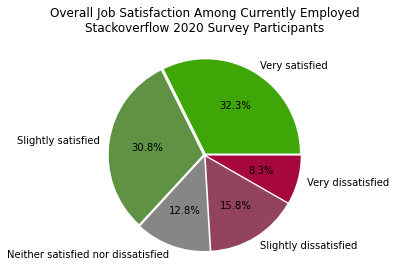

In [18]:
# plot the distribution as pie chart
happy_pie, happy_ax = pie_chart(happy, 'share', 
                                title=f'Overall Job Satisfaction Among Currently Employed\nStackoverflow 2020 Survey Participants', 
                                filename='satisfaction_pie', 
                                colors=['#3EA607', '#5F9343', '#868686', '#93435F', '#A6073E'])

In [19]:
#### which group of developers remain among participants if we exclude NaNs from "Job Satisfaction"?
# Only those who are currently employed!
feature_overview(df, 'Employment', dropna=True)

,count,share
Employed full-time,39045,0.866377
"Independent contractor, freelancer, or self-employed",4560,0.101183
Employed part-time,1462,0.032441


In [20]:
#### What type of job do they have?
feature_overview(df, 'MainBranch', dropna=True)

,count,share
I am a developer by profession,40764,0.901978
"I am not primarily a developer, but I write code sometimes as part of my work",4430,0.098022


#### What are developers looking for in a job?

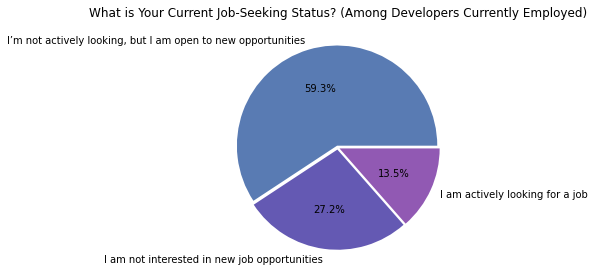

In [21]:
#### Although developers are mostly satisfied - are they open to new job opportunities in general?
seek = feature_overview(df, 'JobSeek', dropna=True)
# plot
seek_pie, seek_ax = pie_chart(seek, 'share', 
                              title=f'What is Your Current Job-Seeking Status? (Among Developers Currently Employed)', 
                              filename='job_seek_pie', colors=['#597BB3', '#6459B3', '#9159B3'])

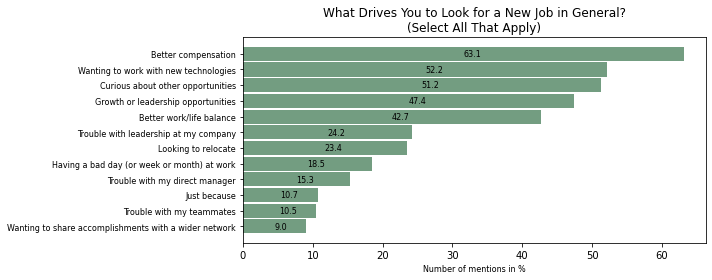

In [22]:
#### MOST IMPORTANT PUSH FACTORS: In general, what drives you to look for a new job?
jobhunt = df['NEWJobHunt'].astype('string').str.get_dummies(sep=';')
jobhunt_count = jobhunt.sum().rename('count')
df_jobhunt = pd.concat([jobhunt_count, (jobhunt_count/jobhunt.shape[0]).rename('share')], axis=1)

# plot
jobhunt_bar, jobhunt_ax = horizontal_bars(df_jobhunt, 'share',
                                          percentage=True,
                                          xlabel='Number of mentions in %',
                                          title='What Drives You to Look for a New Job in General?\n(Select All That Apply)',
                                          filename='jobhunt_bar')

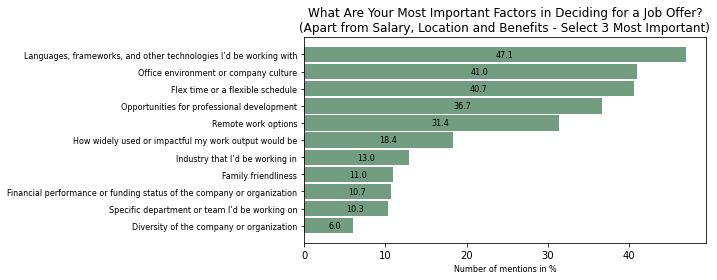

In [23]:
#### MOST IMPORTANT PULL FACTORS: Imagine that you are deciding between two job offers with the same
#### compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?
factors = df['JobFactors'].astype('string').str.get_dummies(sep=';')
factors_count = factors.sum().rename('count')
df_factors = pd.concat([factors_count, (factors_count/factors.shape[0]).rename('share')], axis=1)

# plot
factors_bar, factors_ax = horizontal_bars(df_factors, 'share', 
                                               percentage=True, 
                                               xlabel='Number of mentions in %', 
                                               title=f'What Are Your Most Important Factors in Deciding for a Job Offer?\n(Apart from Salary, Location and Benefits - Select 3 Most Important)', 
                                               filename='factors_bar')

#### Do developers with more competencies in decision-making processes display a higher job satisfaction?

In [24]:
#### Job Satisfaction Comparison: Self-Employed vs. Employed (full-time or part-time)

# filter row entries for employment status
df_selfemp = df.loc[df.Employment == "Independent contractor, freelancer, or self-employed"]
df_emp = df.loc[(df.Employment == "Employed full-time")|(df.Employment == "Employed part-time")]

# get job satisfaction ratings for the two groups
happy_selfemp = (feature_overview(df_selfemp, 'Job_Satisfaction', dropna=True)).add_prefix('selfemp_')
happy_emp = (feature_overview(df_emp, 'Job_Satisfaction', dropna=True)).add_prefix('emp_')

# compare groups to average job satisfaction
df_employment = pd.concat([(happy_emp['emp_share'].sub(happy['share'], axis=0)).rename('employed'),
                           (happy_selfemp['selfemp_share'].sub(happy['share'], axis=0)).rename('self-employed')],
                          axis=1)

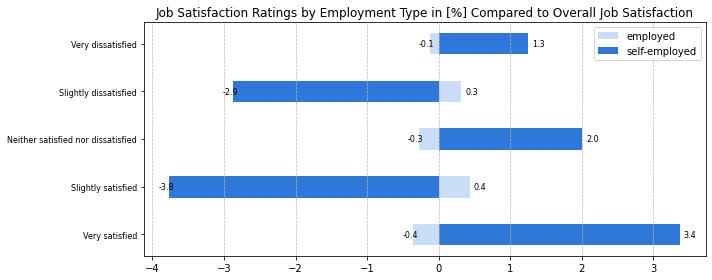

In [37]:
# plot
fig, ax = horizontal_bars_df(df_employment.reindex(happy_index), 
                             title='Job Satisfaction Ratings by Employment Type in [%] Compared to Overall Job Satisfaction', 
                             color=['#CADDF6', '#2D78D9'], 
                             filename='happiness_by_employment', 
                             percentage=True)

In [26]:
#### Job Satisfaction Comparison - by Influence On Purchases (developer position)
purchase_count, purchase_share = feature_by_x(df, 'Job_Satisfaction', 'Influence_On_Purchases')
purchase_share = purchase_share[['I have a great deal of influence',
                                 'I have some influence', 
                                 'I have little or no influence']].reindex(happy_index.reverse())
purchase_share_diff = purchase_share.sub(happy['share'], axis=0)

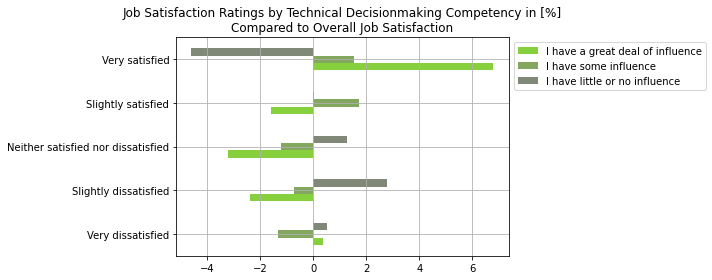

In [27]:
# plot
fig, ax = horizontal_bars_df_multi(purchase_share_diff.reindex(happy_index).dropna(), 
                                        title='Job Satisfaction Ratings by Technical Decisionmaking Competency in [%]\nCompared to Overall Job Satisfaction', 
                                        color=['#86CF3D', '#83A75E', '#808977'], 
                                        filename='happiness_by_purchase', 
                                        percentage=True)

#### Do developers with different levels of participation have different job priorities?

In [28]:
# get total number of participants within each group
influences = df['Influence_On_Purchases']\
            .value_counts()\
            .reindex(['I have a great deal of influence', 'I have some influence', 'I have little or no influence'])

In [29]:
#### PULL FACTORS
# get percentage of satisfaction ratings within each group
factors_by_part = pd.concat([df['Influence_On_Purchases'],factors], axis=1)\
                            .groupby('Influence_On_Purchases').sum()\
                            .reindex(['I have a great deal of influence', 'I have some influence', 'I have little or no influence'])\
                            .divide(influences, axis=0)
# sort columns like in overall rating
factors_by_part= factors_by_part[['Diversity of the company or organization',
                                  'Specific department or team I’d be working on',
                                  'Financial performance or funding status of the company or organization',
                                  'Family friendliness',
                                  'Industry that I’d be working in',
                                  'How widely used or impactful my work output would be',
                                  'Remote work options',
                                  'Opportunities for professional development',
                                  'Flex time or a flexible schedule',
                                  'Office environment or company culture',
                                  'Languages, frameworks, and other technologies I’d be working with']]

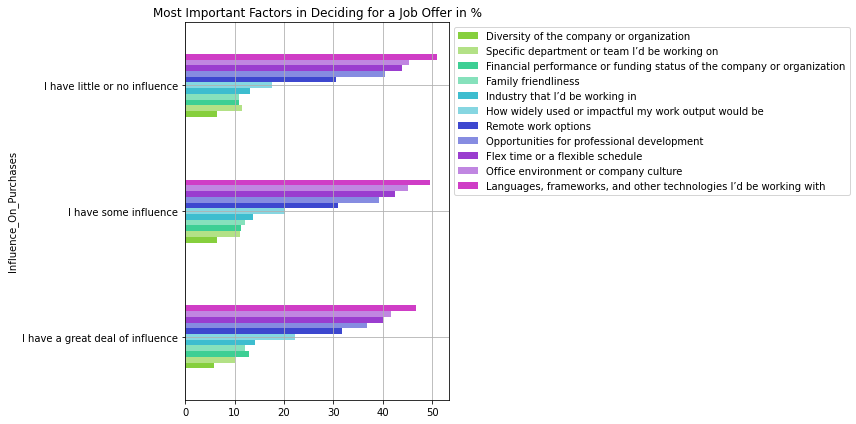

In [30]:
# plot
fig, ax = horizontal_bars_df_multi(factors_by_part, 
                                   title='Most Important Factors in Deciding for a Job Offer in %', 
                                   color=['#86CF3D','#B3E186','#3DCF94','#86E1BC','#3DBDCF','#86D6E1','#3D47CF','#868CE1','#9A3DCF','#C086E1','#CF3DC6','#E186DB'], 
                                   filename='pullfactors_by_purchase', 
                                   percentage=True, 
                                   figsize=(12,6))

In [31]:
#### PUSH FACTORS
# get percentage of satisfaction ratings within each group
jobhunt_by_part = pd.concat([df['Influence_On_Purchases'],jobhunt], axis=1)\
                            .groupby('Influence_On_Purchases').sum()\
                            .reindex(['I have a great deal of influence', 'I have some influence', 'I have little or no influence'])\
                            .divide(influences, axis=0)
# sort columns like in overall rating
jobhunt_by_part= jobhunt_by_part[['Wanting to share accomplishments with a wider network',
                                    'Trouble with my teammates',
                                    'Just because',
                                    'Trouble with my direct manager',
                                    'Having a bad day (or week or month) at work',
                                    'Looking to relocate',
                                    'Trouble with leadership at my company',
                                    'Better work/life balance',
                                    'Growth or leadership opportunities',
                                    'Curious about other opportunities',
                                    'Wanting to work with new technologies',
                                    'Better compensation']]

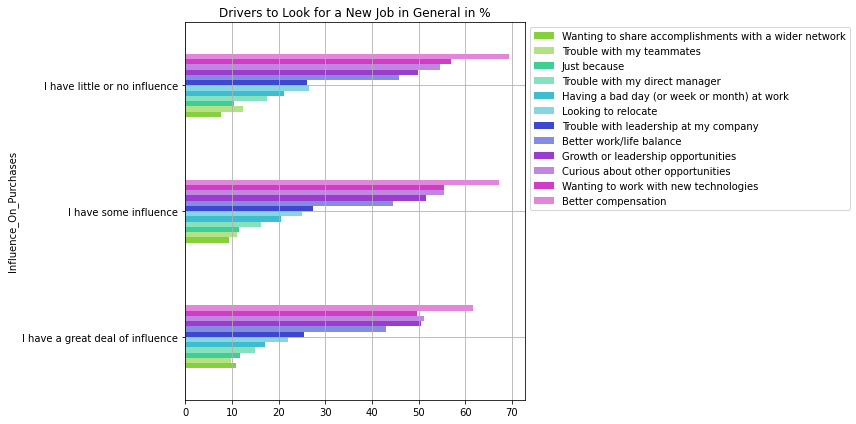

In [32]:
# plot
fig, ax = horizontal_bars_df_multi(jobhunt_by_part, 
                                   title='Drivers to Look for a New Job in General in %', 
                                   color=['#86CF3D','#B3E186','#3DCF94','#86E1BC','#3DBDCF','#86D6E1','#3D47CF','#868CE1','#9A3DCF','#C086E1','#CF3DC6','#E186DB'], 
                                   filename='pushfactors_by_purchase', 
                                   percentage=True, 
                                   figsize=(12,6))

#### Are developers with a higher salary happier?

In [33]:
# check the median salary for different job satisfaction ratings
df.groupby('Job_Satisfaction')['ConvertedComp'].median().rename('Median_Salary').reindex(happy_index)

Job_Satisfaction
not answered                              NaN
Very dissatisfied                     48473.0
Slightly dissatisfied                 45401.0
Neither satisfied nor dissatisfied    39980.5
Slightly satisfied                    51887.0
Very satisfied                        64860.0
Name: Median_Salary, dtype: float64

In [34]:
#### Job Satisfaction Comparison: salary groups below and above median salary
sal_count, sal_share = feature_by_x(df, 'Job_Satisfaction', 'Salary_Group')
sal_share = sal_share.reindex(happy_index)
sal_share_diff = sal_share.sub(happy['share'], axis=0)  # get diffs concerning overall satisfaction
sal_share_diff.index = sal_share_diff.index.rename('Job Satisfaction')

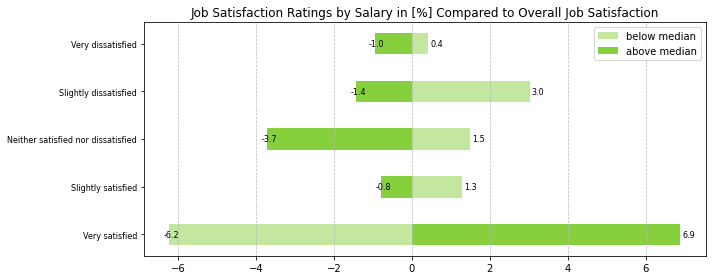

In [35]:
# plot
fig, ax = horizontal_bars_df(sal_share_diff.reindex(happy_index), 
                                  title='Job Satisfaction Ratings by Salary in [%] Compared to Overall Job Satisfaction', 
                                  color=['#C3E79E', '#86CF3D'], 
                                  filename='happiness_by_salary', 
                                  percentage=True)

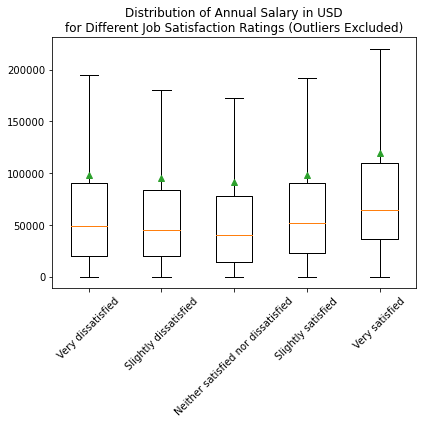

In [36]:
# plot as boxplot without outliers
sal4 = df.loc[df['Job_Satisfaction'] == 'Very satisfied']['ConvertedComp'].dropna()
sal3 = df.loc[df['Job_Satisfaction'] == 'Slightly satisfied']['ConvertedComp'].dropna()
sal2 = df.loc[df['Job_Satisfaction'] == 'Neither satisfied nor dissatisfied']['ConvertedComp'].dropna()
sal1 = df.loc[df['Job_Satisfaction'] == 'Slightly dissatisfied']['ConvertedComp'].dropna()
sal0 = df.loc[df['Job_Satisfaction'] == 'Very dissatisfied']['ConvertedComp'].dropna()
labels = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Very satisfied']
data = [sal0, sal1, sal2, sal3, sal4]

fig, ax = box_plot_multi(data, 
                      labels, 
                      title='Distribution of Annual Salary in USD\nfor Different Job Satisfaction Ratings (Outliers Excluded)', 
                      filename='salary_box_plot', 
                      showmeans=True, 
                      showfliers=False)